In [1]:
import ast
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filtering dataframe with data analyst jobs in US
df_da_us = df[(df['job_title'] == 'Data Analyst') & (df['job_country']== 'United States')].copy()

In [3]:
# converting date column to month number
df_da_us['job_posted_month_no'] = df_da_us['job_posted_date'].dt.month

In [5]:
# exploding skills column
df_da_us_explode = df_da_us.explode('job_skills')

In [9]:
df_da_us_pivot = df_da_us_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)
df_da_us_pivot.loc['Total'] = df_da_us_pivot.sum()
df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc['Total'].sort_values(ascending = False).index]
df_da_us_pivot = df_da_us_pivot.drop('Total')

In [12]:
da_total = df_da_us.groupby('job_posted_month_no').size()
da_total

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [24]:
df_da_perc = df_da_us_pivot.div(da_total/100, axis = 0)

In [72]:
# df_da_perc = df_da_perc.reset_index()
# df_da_perc['job_posted_month'] = df_da_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
# df_da_perc = df_da_perc.set_index('job_posted_month')
# df_da_perc = df_da_perc.drop(columns= 'job_posted_month_no')

df_da_perc


job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


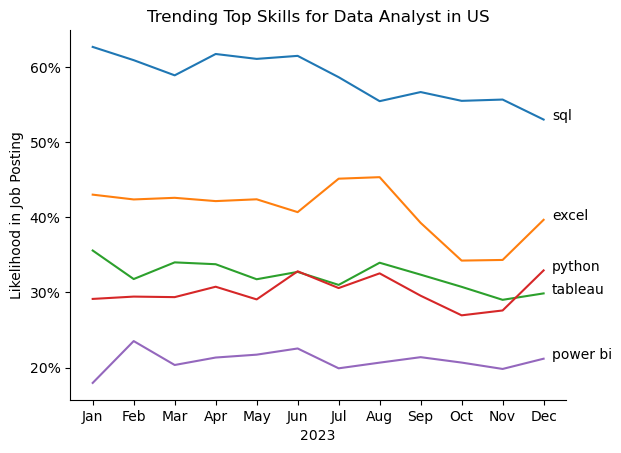

In [71]:
# plotting the top 5 skills in demand
df_plot = df_da_perc.iloc[:,:5]
sns.lineplot(data = df_plot, dashes = False, palette = 'tab10')
sns.despine()

plt.title('Trending Top Skills for Data Analyst in US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel(2023)
plt.legend().remove()

# formatting the text on the y axis and on the lines with percentformatter from matplotlib
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))
for i in range(5): 
		plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i]) # using this to apply text on the 

